# Deep Learning parte 1 Introdução com Keras

## Objetivos
* Aprenda conceitos essenciais de Deep Learning na prática.
* Construa e treine um modelo com Keras e Tensorflow.
* Saiba como selecionar as camadas de um modelo.
* Avalie a performance do modelo e melhore seus resultados.
* Aplique Deep Learning para classificar imagens.

Link: https://cursos.alura.com.br/course/deep-learning-introducao-com-keras

## Importando as bibliotecas necessárias

In [38]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Carregando os dados

In [2]:
dataset = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
tabela_categorias = pd.read_html('https://github.com/zalandoresearch/fashion-mnist')[1]
tabela_categorias

,Label,Description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


## Exploração dos dados

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

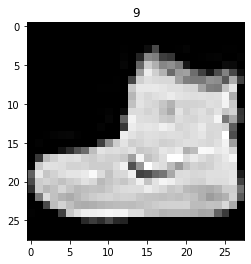

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

plt.show()

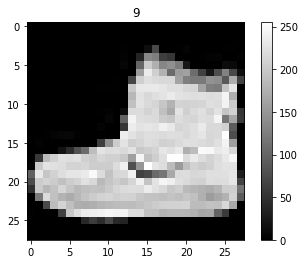

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.title(y_train[0])

plt.show()

In [ ]:
print(y_train.min())
print(y_train.max())

0
9


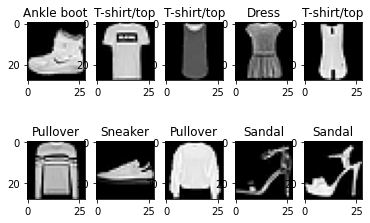

In [ ]:
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(X_train[imagem], cmap='gray')
  identificador = y_train[imagem]
  plt.title(tabela_categorias.query('Label == @identificador')['Description'].values[0])

In [ ]:
modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 3.5163


### Normalizando os dados de treino

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4910


### Adicionando mais camadas internas

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4791


In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(64, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4796


### Aumentando o número de Epoch, ou seja, aumentando o número de processos de treino

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4836 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3629 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3258 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3022 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.8957


In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4786 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3253 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8934


In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(64, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4851 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3644 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3308 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3043 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2879 - accuracy: 0.8921


### Melhor modelo até agora

In [8]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(lr=0.001)
modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train, epochs=30, 
                       batch_size=480,
                       validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 0.6527 - accuracy: 0.7740 - val_loss: 0.4587 - val_accuracy: 0.8391
Epoch 2/30
100/100 [==============================] - 2s 16ms/step - loss: 0.4253 - accuracy: 0.8526 - val_loss: 0.4070 - val_accuracy: 0.8570
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3752 - accuracy: 0.8678 - val_loss: 0.3736 - val_accuracy: 0.8688
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3472 - accuracy: 0.8767 - val_loss: 0.3543 - val_accuracy: 0.8735
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3241 - accuracy: 0.8837 - val_loss: 0.3598 - val_accuracy: 0.8695
Epoch 6/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3082 - accuracy: 0.8885 - val_loss: 0.3368 - val_accuracy: 0.8786
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2877 - accuracy: 0.8960 - val_loss: 0.3451 - val_accuracy: 0.8712

In [ ]:
historico.history

{'accuracy': [0.8229583501815796,
  0.8662083148956299,
  0.877958357334137,
  0.8864791393280029,
  0.8930208086967468,
  0.8975416421890259,
  0.9026874899864197,
  0.9073125123977661,
  0.9112291932106018,
  0.9149791598320007,
  0.9171666502952576,
  0.9189791679382324,
  0.9227916598320007,
  0.925083339214325,
  0.926729142665863,
  0.9290624856948853,
  0.9321458339691162,
  0.9360208511352539,
  0.9356874823570251,
  0.9382083415985107,
  0.9400208592414856,
  0.9411666393280029,
  0.942145824432373,
  0.9452083110809326,
  0.945562481880188,
  0.9485416412353516,
  0.9510833621025085,
  0.9488750100135803,
  0.9502500295639038,
  0.95291668176651],
 'loss': [0.49487245082855225,
  0.3658895790576935,
  0.3311278522014618,
  0.30569934844970703,
  0.2855471074581146,
  0.2730165719985962,
  0.2593475878238678,
  0.24565069377422333,
  0.2365283966064453,
  0.22695745527744293,
  0.21780233085155487,
  0.21157443523406982,
  0.2038702815771103,
  0.19533011317253113,
  0.1907384

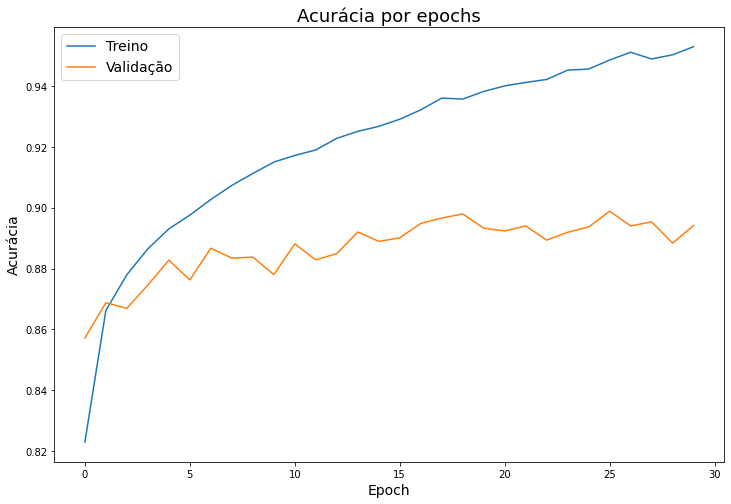

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

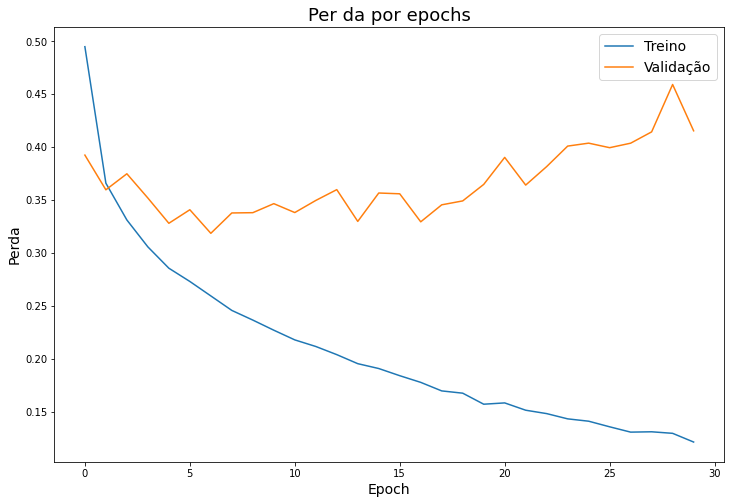

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

In [ ]:
testes = modelo.predict(X_test/255)
print(f'O resultado do teste: {np.argmax(testes[0])}')
print(f'O número da imagem de teste: {y_test[0]}')

O resultado do teste: 9
O número da imagem de teste: 9


In [ ]:
print(f'O resultado do teste: {np.argmax(testes[1])}')
print(f'O número da imagem de teste: {y_test[1]}')

O resultado do teste: 2
O número da imagem de teste: 2


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test/255, y_test)

print(f'Perda do teste: {perda_teste}')
print(f'Acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8892
Perda do teste: 0.44697773456573486
Acurácia do teste: 0.88919997215271


### Adicionando uma camada Dropout
https://keras.io/api/layers/regularization_layers/dropout/

Tecnica que ajuda quando o modelo está overfitting, o DropOut seleciona alguns neuronios que são ignorados durante o treinamento e com isso 

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.8119 - val_loss: 0.4528 - val_accuracy: 0.8277
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8597 - val_loss: 0.4177 - val_accuracy: 0.8493
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3462 - accuracy: 0.8720 - val_loss: 0.3741 - val_accuracy: 0.8702
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8809 - val_loss: 0.3608 - val_accuracy: 0.8695
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8877 - val_loss: 0.3299 - val_accuracy: 0.8802
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.8941 - val_loss: 0.3329 - val_accuracy: 0.8825
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.8992 - val_loss: 0.3170 - val_accuracy:

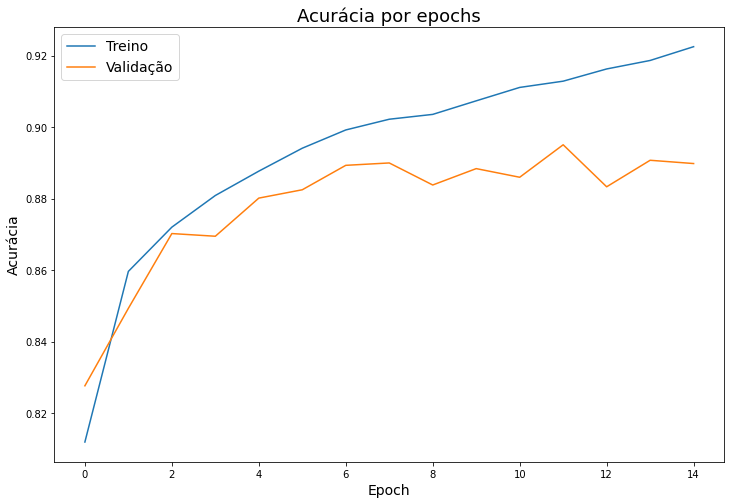

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

## Modelo final criado, compilado, treinado e normalizado

In [20]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train, 
                       batch_size=50,
                       epochs=15, 
                       validation_split=0.2)

Epoch 1/15
960/960 [==============================] - 5s 5ms/step - loss: 0.7672 - accuracy: 0.7476 - val_loss: 0.4987 - val_accuracy: 0.8264
Epoch 2/15
960/960 [==============================] - 5s 5ms/step - loss: 0.4906 - accuracy: 0.8319 - val_loss: 0.4412 - val_accuracy: 0.8454
Epoch 3/15
960/960 [==============================] - 4s 5ms/step - loss: 0.4354 - accuracy: 0.8491 - val_loss: 0.4097 - val_accuracy: 0.8502
Epoch 4/15
960/960 [==============================] - 4s 4ms/step - loss: 0.3991 - accuracy: 0.8600 - val_loss: 0.3823 - val_accuracy: 0.8665
Epoch 5/15
960/960 [==============================] - 4s 5ms/step - loss: 0.3779 - accuracy: 0.8659 - val_loss: 0.3734 - val_accuracy: 0.8675
Epoch 6/15
960/960 [==============================] - 4s 4ms/step - loss: 0.3596 - accuracy: 0.8737 - val_loss: 0.3613 - val_accuracy: 0.8733
Epoch 7/15
960/960 [==============================] - 4s 5ms/step - loss: 0.3435 - accuracy: 0.8781 - val_loss: 0.3507 - val_accuracy: 0.8759
Epoch 

## Salvado o modelo final

In [ ]:
modelo.save('modelo.h5')

## Carregando o modelo final



In [ ]:
modelo_salvo = load_model('modelo.h5')

In [ ]:
testes = modelo_salvo.predict(X_test/255)
print(f'O resultado do teste: {np.argmax(testes[0])}')
print(f'O número da imagem de teste: {y_test[0]}')

O resultado do teste: 9
O número da imagem de teste: 9


In [ ]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(X_test/255, y_test)

print(f'Perda do teste: {perda_teste}')
print(f'Acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3763 - accuracy: 0.8832
Perda do teste: 0.3763449192047119
Acurácia do teste: 0.8831999897956848


In [ ]:
modelo = modelo_salvo

# Deep Learning parte 2: Como a rede aprende


## Sumário do modelo

In [ ]:
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Pesos da primeira camada Dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
len(pesos_camada_dense)

784

### Vieses da primeira camada Dense

Vieses indica a distância de conseguir o resultado esperado

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
len(vieses_camada_dense)

256

## Zerando os pesos para observar o que ocorre

In [ ]:
modelo = load_model('modelo.h5')
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense]) 
modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train_normalizado = X_train/255.0

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5410 - accuracy: 0.8036 - val_loss: 0.4057 - val_accuracy: 0.8562
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3942 - accuracy: 0.8534 - val_loss: 0.4029 - val_accuracy: 0.8450
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3575 - accuracy: 0.8674 - val_loss: 0.3905 - val_accuracy: 0.8599
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3318 - accuracy: 0.8777 - val_loss: 0.3682 - val_accuracy: 0.8643
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3139 - accuracy: 0.8826 - val_loss: 0.3379 - val_accuracy: 0.8762
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8886 - val_loss: 0.3170 - val_accuracy: 0.8838
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2853 - accuracy: 0.8919 - val_loss: 0.3171 - val_accuracy:

In [ ]:
modelo.layers[1].get_weights()[0]

array([[ 0.        ,  0.        , -0.00471547, ...,  0.        ,
         0.10582837, -0.3871572 ],
       [ 0.        ,  0.        , -0.01888072, ...,  0.        ,
         0.11139676, -0.39744636],
       [ 0.        ,  0.        , -0.03342143, ...,  0.        ,
        -0.22625934, -0.5166152 ],
       ...,
       [ 0.        ,  0.        ,  0.02093125, ...,  0.        ,
         0.15845574,  0.0393565 ],
       [ 0.        ,  0.        ,  0.03932683, ...,  0.        ,
         0.05400494, -0.2182498 ],
       [ 0.        ,  0.        ,  0.03332011, ...,  0.        ,
         0.14160286, -0.36955026]], dtype=float32)

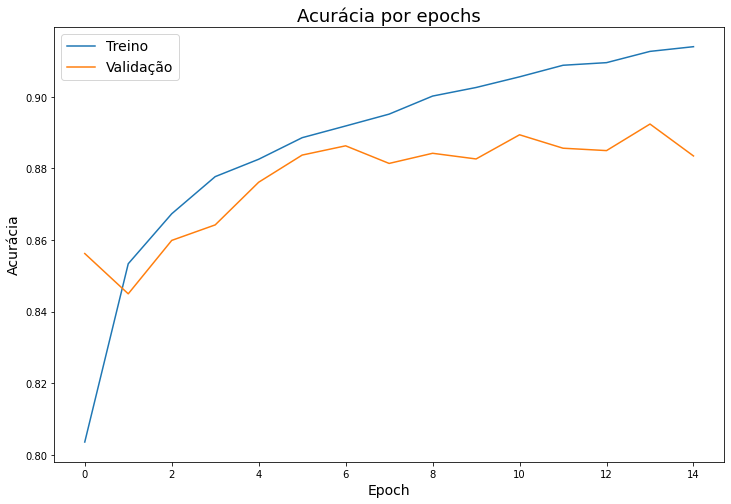

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

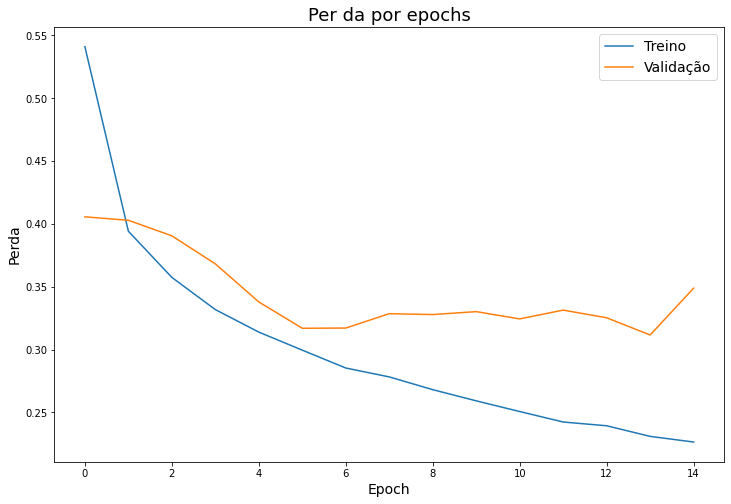

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

## Ajustando os pesos com números aleatórios para observar o efeito

In [ ]:
modelo = load_model('modelo.h5')
x, y = pesos_camada_dense.shape
pesos_camada_dense_aleatorios = np.random.rand(x,y)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

In [ ]:
X_train_normalizado = X_train/255.0

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 111.5313 - accuracy: 0.3613 - val_loss: 1.3394 - val_accuracy: 0.4861
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4705 - accuracy: 0.4231 - val_loss: 1.2799 - val_accuracy: 0.4914
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5471 - accuracy: 0.3837 - val_loss: 1.2935 - val_accuracy: 0.5240
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6008 - accuracy: 0.3849 - val_loss: 1.3587 - val_accuracy: 0.4802
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5911 - accuracy: 0.3954 - val_loss: 1.5383 - val_accuracy: 0.3857
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5951 - accuracy: 0.3936 - val_loss: 1.3616 - val_accuracy: 0.4967
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5880 - accuracy: 0.4003 - val_loss: 1.8969 - val_accurac

In [ ]:
modelo.layers[1].get_weights()[0]

array([[ 0.6641103 ,  0.95357585,  0.64888614, ...,  0.28706852,
         0.2317307 ,  0.02652483],
       [ 0.59971684,  0.3220345 ,  1.0519868 , ...,  0.8752168 ,
         0.02469814,  0.42857152],
       [ 0.5261829 ,  0.79345906,  0.25376788, ...,  0.09859915,
         0.84973216, -0.07996259],
       ...,
       [ 0.8417524 ,  0.01774569,  0.513133  , ...,  0.41001692,
         0.51378375,  0.880413  ],
       [ 0.49890673,  0.29584783,  0.94940954, ..., -0.08339058,
         0.58938605,  0.55424005],
       [ 0.71933   ,  0.19998157,  0.7573691 , ...,  0.03205001,
         0.80206126, -0.10970936]], dtype=float32)

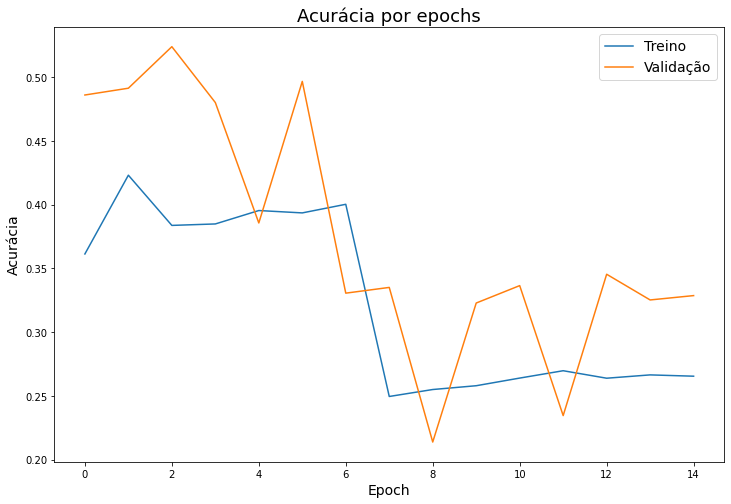

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

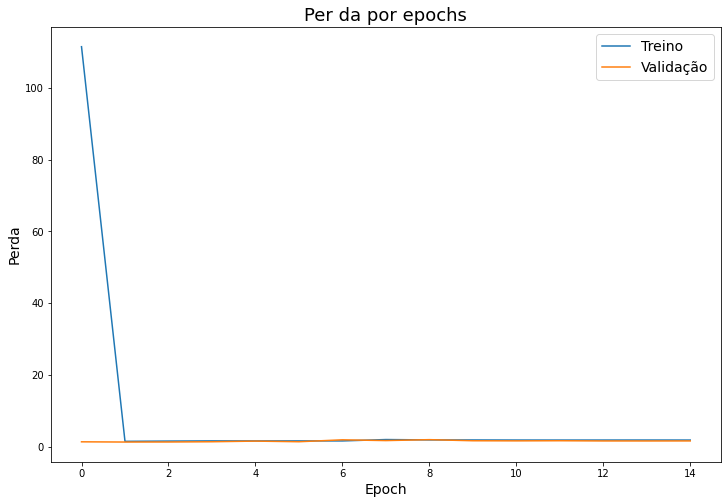

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

## Metodo get_config()

In [ ]:
 modelo.get_config()


# O algoritmo GlorotUniform, ou algoritmo de Xavier, é um algoritmo matematico que o keras roda para avaliar os pesos
# dos neuronios, com isso auxilia em escolher pesos na medida certa, sem pesos muito grandes ou muito pequenos.

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_12_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_12',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_34',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias

## Zerando os vieses para observar o efeito

In [ ]:
modelo = load_model('modelo.h5')
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)
modelo.layers[1].set_weights([pesos_camada_dense, vieses_camada_dense_zerados]) 
modelo.layers[1].get_weights()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
X_train_normalizado = X_train/255.0

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2062 - accuracy: 0.9222 - val_loss: 0.3311 - val_accuracy: 0.8923
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1991 - accuracy: 0.9259 - val_loss: 0.3653 - val_accuracy: 0.8867
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1929 - accuracy: 0.9263 - val_loss: 0.3512 - val_accuracy: 0.8932
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1895 - accuracy: 0.9275 - val_loss: 0.3671 - val_accuracy: 0.8918
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1862 - accuracy: 0.9288 - val_loss: 0.3818 - val_accuracy: 0.8879
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1783 - accuracy: 0.9315 - val_loss: 0.3677 - val_accuracy: 0.8920
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1774 - accuracy: 0.9324 - val_loss: 0.3500 - val_accuracy:

In [ ]:
modelo.layers[1].get_weights()[1]

array([-9.27568600e-02,  0.00000000e+00,  6.45759031e-02,  1.85385659e-01,
       -3.96255940e-01, -2.65768287e-03,  7.24503919e-02, -5.56561258e-03,
       -1.72320716e-02, -7.60357752e-02, -2.12205827e-01, -6.89918268e-03,
        0.00000000e+00,  2.45732442e-02,  2.24771188e-08,  3.56594664e-13,
       -1.24487691e-02, -9.54542831e-02,  9.51876566e-02,  1.58102036e-01,
        2.06169672e-02,  4.60261181e-02,  5.76704815e-02,  4.96437214e-02,
        1.90446347e-01, -4.61663783e-01,  9.64949876e-02,  7.59963617e-02,
       -1.23902513e-02,  0.00000000e+00,  0.00000000e+00,  4.82333377e-02,
        1.20875165e-02,  0.00000000e+00,  1.86998705e-07,  0.00000000e+00,
        2.04123184e-03,  3.21331822e-06, -1.76254153e-01, -4.43049520e-02,
        4.96688299e-02, -3.66360635e-01, -3.53841456e-10, -1.46609679e-01,
        1.40035078e-01,  8.81947875e-02, -2.61693611e-03,  2.68261097e-02,
        9.17974040e-02, -4.29054707e-01,  2.42872685e-01,  1.49821118e-01,
       -1.49995923e-01,  

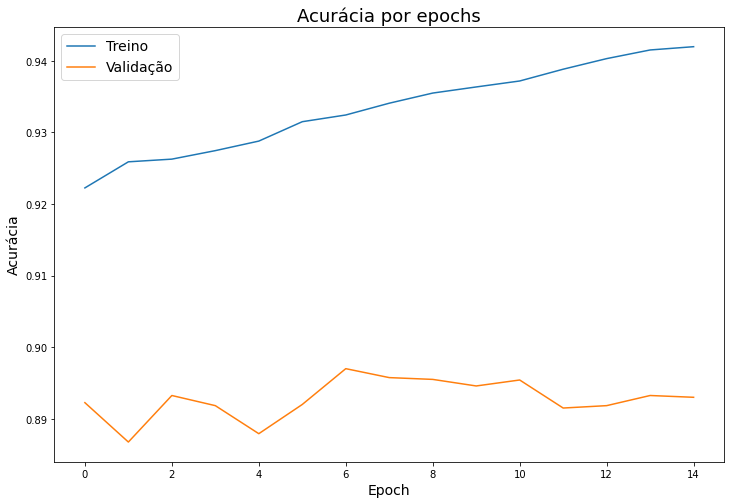

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

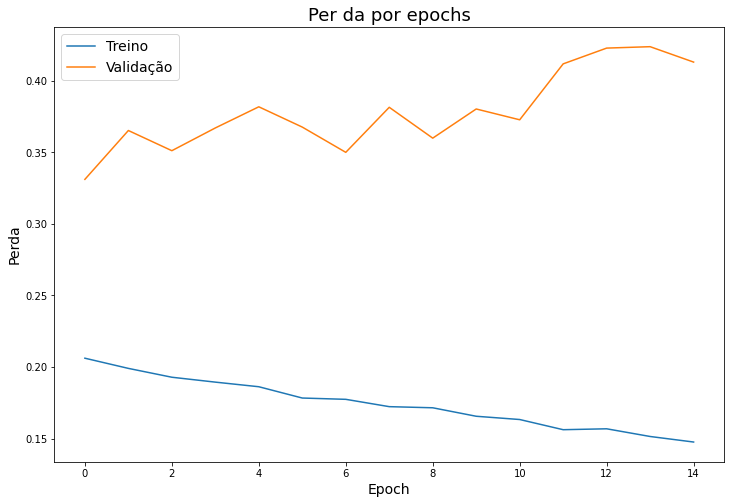

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

## Ajustando os vieses para valores aleatórios e observados os efeitos

In [ ]:
modelo = load_model('modelo.h5')
x, = vieses_camada_dense.shape
vieses_camada_dense_aleatorios = np.random.rand(x)
modelo.layers[1].set_weights([pesos_camada_dense, vieses_camada_dense_aleatorios])

In [ ]:
X_train_normalizado = X_train/255.0

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2097 - accuracy: 0.9206 - val_loss: 0.3389 - val_accuracy: 0.8932
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1997 - accuracy: 0.9241 - val_loss: 0.3382 - val_accuracy: 0.8901
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1954 - accuracy: 0.9256 - val_loss: 0.3880 - val_accuracy: 0.8888
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1900 - accuracy: 0.9272 - val_loss: 0.3826 - val_accuracy: 0.8881
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1838 - accuracy: 0.9292 - val_loss: 0.3624 - val_accuracy: 0.8928
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1811 - accuracy: 0.9312 - val_loss: 0.3498 - val_accuracy: 0.8943
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1773 - accuracy: 0.9324 - val_loss: 0.3641 - val_accuracy:

In [ ]:
modelo.layers[1].get_weights()[1]

array([ 0.23997633,  0.6427613 ,  0.5513096 ,  0.6069636 ,  0.15701383,
        0.3022087 ,  0.31749484,  0.6795518 ,  0.9070892 ,  0.5097514 ,
        0.15265965,  0.00876955,  0.57855105,  0.44029358,  0.29172415,
        0.44513294,  0.17620824,  0.11983013,  0.167283  ,  0.6634128 ,
        0.23079744,  0.17062135,  0.8560088 ,  0.5586803 ,  0.7207139 ,
       -0.31675187,  0.7414023 ,  0.6390005 ,  0.32519683,  0.9258246 ,
        0.9434343 ,  0.74212223,  0.5482687 ,  0.6163686 ,  0.10019009,
        0.4442828 ,  0.3235537 ,  0.30770615,  0.28970498,  1.0508962 ,
        0.7576586 ,  0.16001485,  0.5293902 ,  0.19130272,  0.27560392,
        0.68570954,  0.8626277 ,  0.28372294,  0.24521647,  0.5076041 ,
        0.54539806,  0.5233036 ,  0.6178517 ,  0.71418554,  0.71121794,
        0.7234897 ,  0.1812827 ,  0.8195118 ,  0.40499717,  0.38287443,
        0.9317283 ,  0.91799724,  0.59345096, -0.03534435,  0.70046705,
        0.12490416,  0.58288735,  0.7097056 ,  0.05523428,  0.88

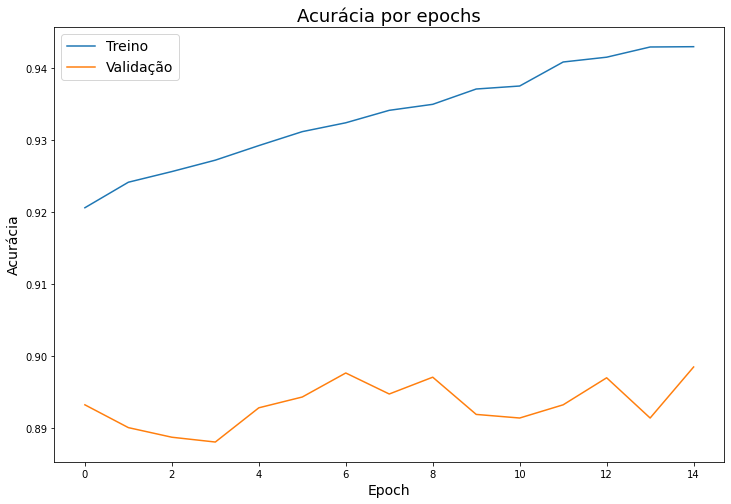

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

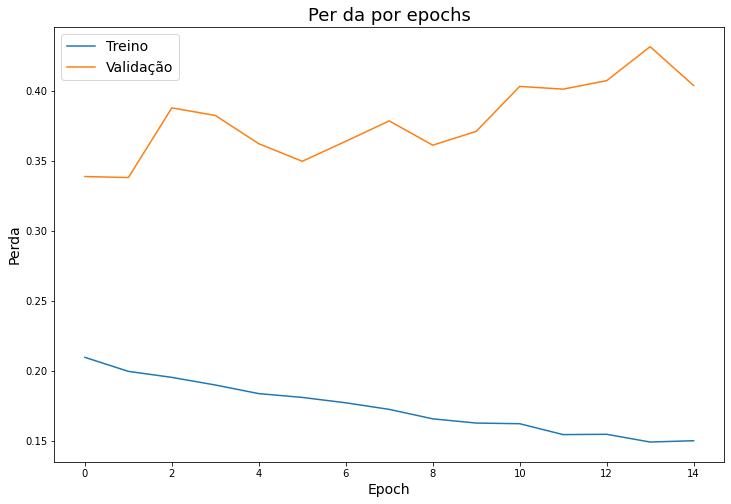

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

## Instanciando o otimizar e modificando seus parametros 

**Learning_rate** é o parametro que fornece o passo do treino ao longo de cada update do gradiente

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train,
                       epochs=15, 
                       validation_split=0.2)

##Modificando o batch_size

Batch_size é o número de amostras que será fornecido para treinamento para cada update de gradiente. 

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

adam = keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train, 
                       batch_size=50,
                       epochs=15, 
                       validation_split=0.2)

## Utilizando callbacks - EarlyStopping

Quando a acurácia e a perda não diminui depois de x epochs, vale a pena parar o treino e alterar os parametros. Para parar utilizamos o **callback**

In [34]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

adam = keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train, 
                       batch_size=50,
                       epochs=15, 
                       validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/15
960/960 [==============================] - 5s 5ms/step - loss: 0.5295 - accuracy: 0.8092 - val_loss: 0.3920 - val_accuracy: 0.8577
Epoch 2/15
960/960 [==============================] - 4s 5ms/step - loss: 0.3847 - accuracy: 0.8595 - val_loss: 0.3671 - val_accuracy: 0.8659
Epoch 3/15
960/960 [==============================] - 5s 5ms/step - loss: 0.3457 - accuracy: 0.8723 - val_loss: 0.3640 - val_accuracy: 0.8664
Epoch 4/15
960/960 [==============================] - 5s 5ms/step - loss: 0.3191 - accuracy: 0.8821 - val_loss: 0.3541 - val_accuracy: 0.8742
Epoch 5/15
960/960 [==============================] - 5s 5ms/step - loss: 0.3017 - accuracy: 0.8874 - val_loss: 0.3189 - val_accuracy: 0.8835
Epoch 6/15
960/960 [==============================] - 5s 5ms/step - loss: 0.2816 - accuracy: 0.8944 - val_loss: 0.3415 - val_accuracy: 0.8824
Epoch 7/15
960/960 [==============================] - 5s 5ms/step - loss: 0.2747 - accuracy: 0.8979 - val_loss: 0.3215 - val_accuracy: 0.8838
Epoch 

In [39]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='melhor_modelo.hdf5', 
                             monitor='val_loss', save_best_only=True)]

adam = keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_normalizado, y_train, 
                       batch_size=50,
                       epochs=15, 
                       validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/15
960/960 [==============================] - 7s 6ms/step - loss: 0.5285 - accuracy: 0.8099 - val_loss: 0.4069 - val_accuracy: 0.8558
Epoch 2/15
960/960 [==============================] - 5s 5ms/step - loss: 0.3855 - accuracy: 0.8604 - val_loss: 0.3595 - val_accuracy: 0.8671
Epoch 3/15
960/960 [==============================] - 5s 5ms/step - loss: 0.3430 - accuracy: 0.8752 - val_loss: 0.3711 - val_accuracy: 0.8653
Epoch 4/15
960/960 [==============================] - 5s 6ms/step - loss: 0.3176 - accuracy: 0.8828 - val_loss: 0.3340 - val_accuracy: 0.8787
Epoch 5/15
960/960 [==============================] - 5s 6ms/step - loss: 0.3035 - accuracy: 0.8882 - val_loss: 0.3406 - val_accuracy: 0.8734
Epoch 6/15
960/960 [==============================] - 5s 6ms/step - loss: 0.2898 - accuracy: 0.8919 - val_loss: 0.3214 - val_accuracy: 0.8817
Epoch 7/15
960/960 [==============================] - 6s 6ms/step - loss: 0.2755 - accuracy: 0.8974 - val_loss: 0.3231 - val_accuracy: 0.8865
Epoch 